In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sweetviz
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [2]:
dados = pd.read_csv('./sample_data/california_housing_train.csv')
dados.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0
5,-114.58,33.63,29.0,1387.0,236.0,671.0,239.0,3.3438,74000.0
6,-114.58,33.61,25.0,2907.0,680.0,1841.0,633.0,2.6768,82400.0
7,-114.59,34.83,41.0,812.0,168.0,375.0,158.0,1.7083,48500.0
8,-114.59,33.61,34.0,4789.0,1175.0,3134.0,1056.0,2.1782,58400.0
9,-114.60,34.83,46.0,1497.0,309.0,787.0,271.0,2.1908,48100.0


# Análise Exploratória


**Id** - Id única de cada local

**latitude** - latitude do local

**longitude** - longitude do local

**median_age** - mediana das idades das casas no local

**total_rooms** - contagem do total de cômodos na região

**total_bedrooms** - contagem do total de quartos na região

**population** - população total na região

**households** - número total de casas na região

**median_income** - mediana da renda das pessoas na região (em dezenas de milhares por ano)

**median_house_value** - mediana dos valores das casas da região - ***variável-alvo***

Este conjunto de dados contém uma linha por grupo de blocos do censo. Um grupo de quarteirões é a menor unidade geográfica para a qual o U.S. Census Bureau publica dados de amostra (um grupo de quarteirões normalmente tem uma população de 600 a 3.000 pessoas).

In [3]:
dados.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
dados.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [5]:
analise = sweetviz.analyze(dados)
analise.show_html()

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Mapa de calor da correlação de Pearson

/tmp/ipykernel_59822/3948151688.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))


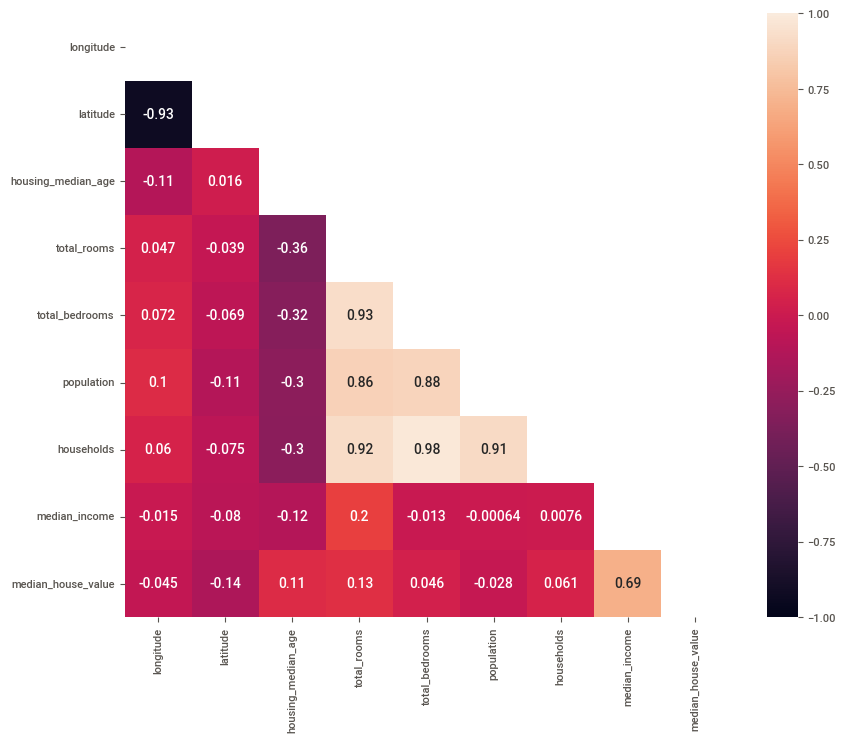

In [6]:
mask = np.triu(np.ones_like(dados.corr(), dtype=np.bool))
plt.figure(figsize=(10, 8))
sns.heatmap(dados.corr(), mask=mask, square = True, annot = True, vmin = -1, vmax = 1)
plt.show()

## Vamos passar o valor alvo para a variável Y

In [7]:
y = dados.median_house_value
y

0         66900.0
1         80100.0
2         85700.0
3         73400.0
4         65500.0
           ...   
16995    111400.0
16996     79000.0
16997    103600.0
16998     85800.0
16999     94600.0
Name: median_house_value, Length: 17000, dtype: float64

In [8]:
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households','median_income']
X = dados[features]
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250
...,...,...,...,...,...,...,...,...
16995,-124.26,40.58,52.0,2217.0,394.0,907.0,369.0,2.3571
16996,-124.27,40.69,36.0,2349.0,528.0,1194.0,465.0,2.5179
16997,-124.30,41.84,17.0,2677.0,531.0,1244.0,456.0,3.0313
16998,-124.30,41.80,19.0,2672.0,552.0,1298.0,478.0,1.9797


## Construindo o modelo

### Usar Scikit-Learn
**Define** = Escolha de modelo (define parâmetros)

**Fit** = Treinar

**Predict** = Fazer a Predição

**Evaluate** = Avaliar os resultados

In [9]:
modelo = KNeighborsRegressor(5)

## Treinamento do Modelo KNN

In [10]:
modelo.fit(X, y)
dados.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [11]:
X.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250


In [12]:
modelo.predict(X.head(5))

array([107800. , 201300. , 123940. , 177800.2, 175620. ])

## Validar o Modelo

In [13]:
predicao = modelo.predict(X)

In [14]:
mean_absolute_error(y, predicao)

62084.118705882356

In [15]:
dados2 = pd.DataFrame(y)
dados2['predicao'] = predicao
dados2.sample(10)

,median_house_value,predicao
227,85200.0,152960.0
16580,240200.0,326720.0
6283,100800.0,175840.0
15951,240900.0,159180.0
10692,28300.0,141960.0
13887,134800.0,202160.0
480,379600.0,459340.6
5849,126600.0,134840.0
15307,108300.0,110800.0
3095,238300.0,255560.0


In [16]:
dados2.describe()

,median_house_value,predicao
count,17000.000000,17000.000000
mean,207300.912353,207026.626329
std,115983.764387,80976.854311
min,14999.000000,65220.000000
25%,119400.000000,147955.000000
50%,180400.000000,186870.000000
75%,265000.000000,248105.000000
max,500001.000000,500001.000000


## Validação dos dados
Agora de uma maneira diferente

In [26]:
treino_X, val_X, treino_y, val_y = train_test_split(X, y, random_state=1, train_size=0.88) # Treino com 80% para treinar e 20% para testar
treino_X.shape

(14960, 8)

In [27]:
modelo2 = KNeighborsRegressor(29)
modelo2.fit(treino_X, treino_y)

KNeighborsRegressor(n_neighbors=29)

In [28]:
predicao2 = modelo2.predict(val_X)

In [29]:
mean_absolute_error(val_y, predicao2)

74401.6478025693

# Predição
Agora usando Árvores de Decisão

In [30]:
modelo_tree = DecisionTreeRegressor(random_state = 1, min_samples_leaf = 17)
modelo_tree.fit(X, y)
predicao_tree = modelo_tree.predict(X)
mean_absolute_error(y, predicao_tree)

31780.73094729881

## Treino - Dados de Treino e Teste

Fazendo essa separação, o resulado do teste é mais real

In [31]:
modelo_tree.fit(treino_X, treino_y)
predicao = modelo_tree.predict(val_X)
mean_absolute_error(val_y, predicao)

37957.25071371139

## Usando Random Forest